In [1]:
# Импортируем библиотеку pandas для работы с данными
import pandas as pd

In [7]:
# Загружаем данные Tesla 
tesla_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Проект АйтиШАГ\Project_ITSTEP\ИСТОРИЯ_ЦЕНЫ_АКЦИЙ_TESLA.csv')

In [8]:
# Загружаем данные авиакатастроф 
crashes_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Проект АйтиШАГ\Project_ITSTEP\Авиакатастрофы_и_cмерти.csv', encoding='utf-8')

In [11]:
# Выводим первые 5 строк, чтобы проверить, что данные загрузились верно
print("===== Данные Tesla =====")
print(tesla_data.head())

print("\n===== Данные авиакатастроф =====")
print(crashes_data.head())

===== Данные Tesla =====
         Date     Close      High       Low      Open     Volume
0  2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1  2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2  2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3  2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4  2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500

===== Данные авиакатастроф =====
   Year  Deaths  Crashes
0  1970    2226      298
1  1971    2228      271
2  1972    3346      344
3  1973    2814      333
4  1974    2621      270


In [18]:
# Оставляем только дату и цену закрытия акций Tesla
tesla_data = tesla_data[['Date', 'Close']]

print("===== Данные Tesla (только дата и цена) =====")
print(tesla_data.head())

===== Данные Tesla (только дата и цена) =====
         Date     Close
0  2010-06-29  1.592667
1  2010-06-30  1.588667
2  2010-07-01  1.464000
3  2010-07-02  1.280000
4  2010-07-06  1.074000


In [19]:
# Преобразуем дату в год 
tesla_data['Year'] = pd.to_datetime(tesla_data['Date']).dt.year

# Теперь группируем по годам и считаем среднюю цену за год
tesla_year_avg = tesla_data.groupby('Year')['Close'].mean().reset_index()

# Проверяем
print("\n===== Средняя цена Tesla по годам =====")
print(tesla_year_avg.head())


===== Средняя цена Tesla по годам =====
   Year      Close
0  2010   1.556123
1  2011   1.786984
2  2012   2.077907
3  2013   6.960082
4  2014  14.888606


In [21]:
# Объединяем таблицы по году
merged_data = pd.merge(tesla_year_avg, crashes_data, on='Year')

# Проверяем
print("\n===== Объединённые данные =====")
print(merged_data.head())


===== Объединённые данные =====
   Year      Close  Deaths  Crashes
0  2010   1.556123    1130      162
1  2011   1.786984     828      154
2  2012   2.077907     800      156
3  2013   6.960082     459      138
4  2014  14.888606    1328      122


In [22]:
import matplotlib.pyplot as plt  # библиотека для графиков

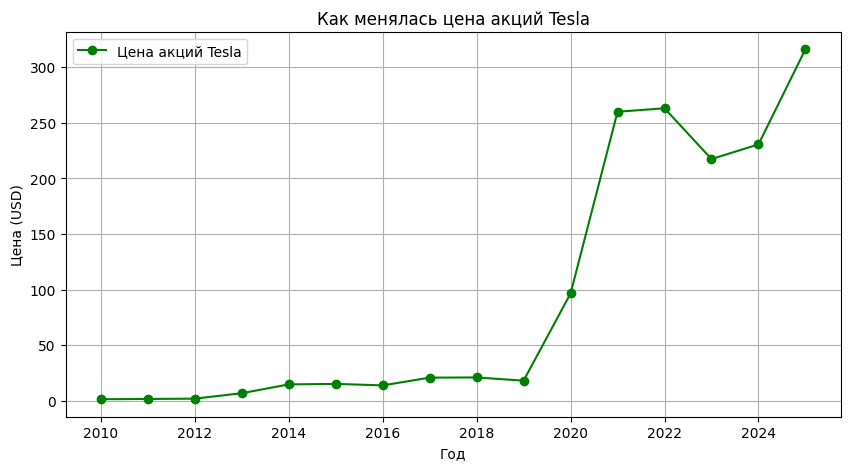

In [27]:
# Создание графика цены Tesla
plt.figure(figsize=(10, 5))  # задаём размер графика
plt.plot(merged_data['Year'], merged_data['Close'], label='Цена акций Tesla', color='green', marker='o')
plt.xlabel('Год')  # подпись оси X
plt.ylabel('Цена (USD)')  # подпись оси Y
plt.title('Как менялась цена акций Tesla')  
plt.legend()  # показываем легенду
plt.grid()  # добавляем сетку
plt.show()  # показываем график

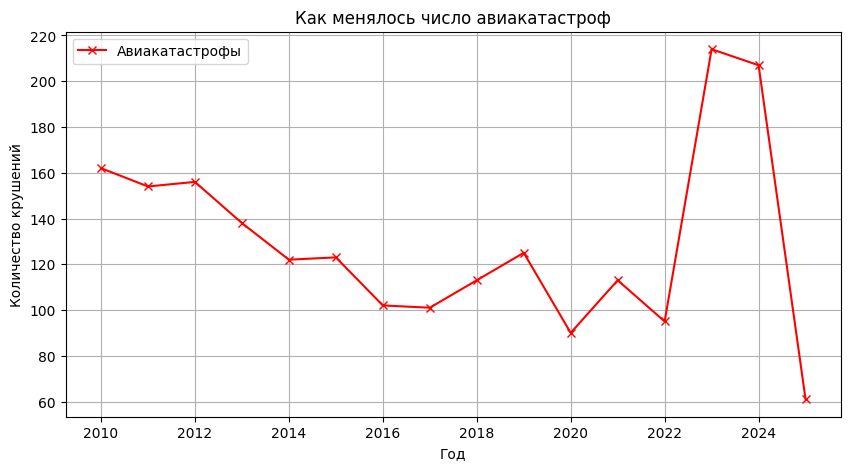

In [28]:
# Создание графика авиакатастроф
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Year'], merged_data['Crashes'], label='Авиакатастрофы', color='red', marker='x')
plt.xlabel('Год')
plt.ylabel('Количество крушений')
plt.title('Как менялось число авиакатастроф')
plt.legend()
plt.grid()
plt.show()

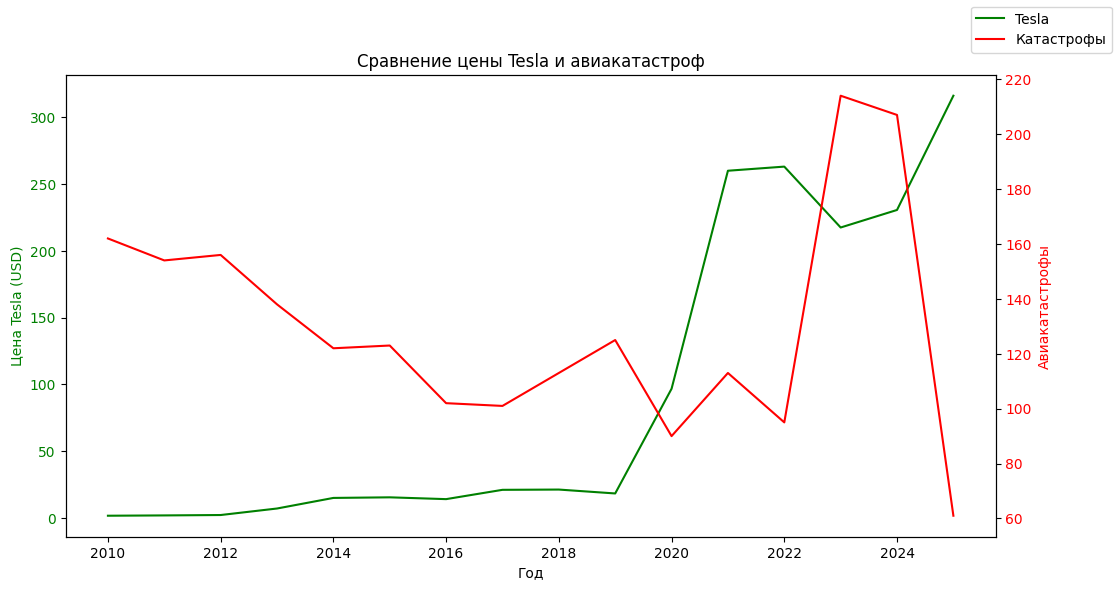

In [29]:
# Совмещённый график (чтобы увидеть взаимосвязь)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Левая ось Y — цена Tesla (зелёная)
ax1.set_xlabel('Год')
ax1.set_ylabel('Цена Tesla (USD)', color='green')
ax1.plot(merged_data['Year'], merged_data['Close'], color='green', label='Tesla')
ax1.tick_params(axis='y', labelcolor='green')

# Правая ось Y — авиакатастрофы (красная)
ax2 = ax1.twinx()
ax2.set_ylabel('Авиакатастрофы', color='red')
ax2.plot(merged_data['Year'], merged_data['Crashes'], color='red', label='Катастрофы')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Сравнение цены Tesla и авиакатастроф')
fig.legend(loc='upper right')
plt.show()

In [30]:
# Считаем корреляцию между ценой Tesla и авиакатастрофами
correlation = merged_data[['Close', 'Crashes']].corr()

print("=== Корреляция ===")
print(correlation)

=== Корреляция ===
           Close  Crashes
Close    1.00000 -0.06056
Crashes -0.06056  1.00000


In [35]:
# Убедимся, что данные загружены
print(tesla_data.head())

# Оставляем только год и цену закрытия
tesla_for_forecast = tesla_year_avg[['Year', 'Close']]

         Date     Close  Year
0  2010-06-29  1.592667  2010
1  2010-06-30  1.588667  2010
2  2010-07-01  1.464000  2010
3  2010-07-02  1.280000  2010
4  2010-07-06  1.074000  2010


In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Готовим данные для модели
X = tesla_for_forecast['Year'].values.reshape(-1, 1)  # Года как признаки
y = tesla_for_forecast['Close'].values                # Цены как целевая переменная

# Обучаем модель
model = LinearRegression()
model.fit(X, y)

# Прогнозируем на 3 года вперёд
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
future_prices = model.predict(future_years)

# Создаём таблицу с прогнозом
forecast_tesla = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Close': future_prices
})

print("=== Прогноз цены Tesla ===")
print(forecast_tesla)

=== Прогноз цены Tesla ===
   Year  Predicted_Close
0  2024       232.455855
1  2025       253.785784
2  2026       275.115714
3  2027       296.445643
4  2028       317.775572


In [38]:
crashes_for_forecast = crashes_data[['Year', 'Crashes']]

In [39]:
# Вычисляем среднее за последние 5 лет
last_5_year_avg = crashes_for_forecast['Crashes'].tail(5).mean()

# Прогноз - оставляем примерно на том же уровне
forecast_crashes = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'Predicted_Crashes': [last_5_year_avg] * 3
})

print("\n=== Прогноз авиакатастроф ===")
print(forecast_crashes)


=== Прогноз авиакатастроф ===
   Year  Predicted_Crashes
0  2024              138.0
1  2025              138.0
2  2026              138.0


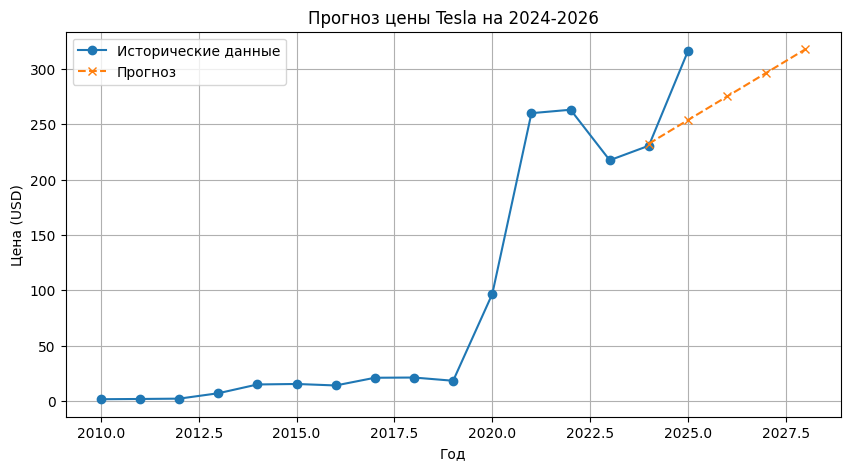

In [41]:
# График для Tesla
plt.figure(figsize=(10, 5))
plt.plot(tesla_for_forecast['Year'], tesla_for_forecast['Close'], label='Исторические данные', marker='o')
plt.plot(forecast_tesla['Year'], forecast_tesla['Predicted_Close'], label='Прогноз', linestyle='--', marker='x')
plt.title('Прогноз цены Tesla на 2024-2026')
plt.xlabel('Год')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid()
plt.show()

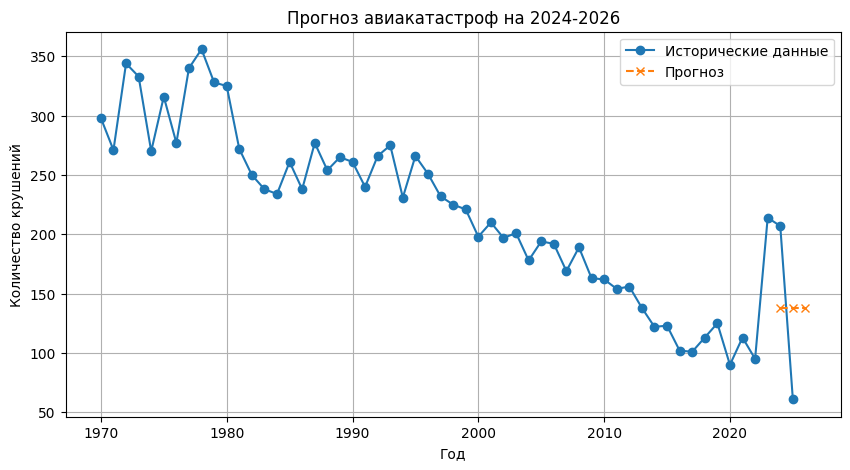

In [42]:
# График для авиакатастроф
plt.figure(figsize=(10, 5))
plt.plot(crashes_for_forecast['Year'], crashes_for_forecast['Crashes'], label='Исторические данные', marker='o')
plt.plot(forecast_crashes['Year'], forecast_crashes['Predicted_Crashes'], label='Прогноз', linestyle='--', marker='x')
plt.title('Прогноз авиакатастроф на 2024-2026')
plt.xlabel('Год')
plt.ylabel('Количество крушений')
plt.legend()
plt.grid()
plt.show()